# Lithium Blood-Brain-Barrier Penetration Classification

### Imports

In [1]:
from smdt import datasets, molecular_descriptors, classification, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


### Data

#### Data Loading

In [2]:
LiBloodBarrier = datasets.load_LiBloodBarrier()

Reference: 
Hu Li, Chun Wei Yap, Choong Yong Ung, Ying Xue, Zhi Wei Cao and Yu Zong Chen, J. Chem. Inf. Model. 2005


#### Descriptor Calculation

In [3]:
data = molecular_descriptors.getAllDescriptors(LiBloodBarrier)


Calculating Molecular Descriptors...
Row 387 out of 387
Calculating Molecular Descriptors Completed.


#### Data Cleaning

In [4]:
y = data['Target']
X = data.drop(['Target'], axis=1)

#### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Models

#### Gaussian Naive Bayes

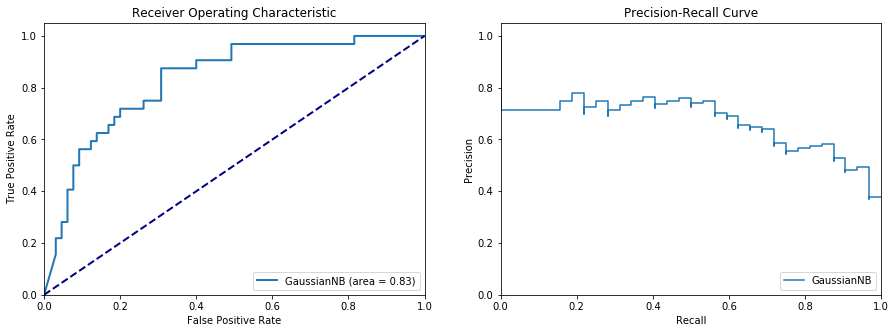

Training data best accuracy: 0.75241
Testing data accuracy: 0.77126

Classification Report:
             precision    recall  f1-score   support

          n       0.67      0.62      0.65        32
          p       0.82      0.85      0.83        65

avg / total       0.77      0.77      0.77        97



In [6]:
scores1, feature_names1, y_score1 = classification.fit_GaussianNB(X_train, X_test, y_train, y_test, 'n')

In [7]:
feature_names1

Index([['AW', 'Xu', 'MZM1', 'diametert', 'bcutv14', 'IC1', 'IC3', 'CATS_DL9', 'CATS_AL9', 'Tac', 'Tnc', 'Tpc', 'Qass', 'QHmax', 'dchi0', 'Smax33', 'Smin33', 'MTPSA', 'EstateVSA1', 'ATSe8']], dtype='object')

#### K Nearest Neighbors

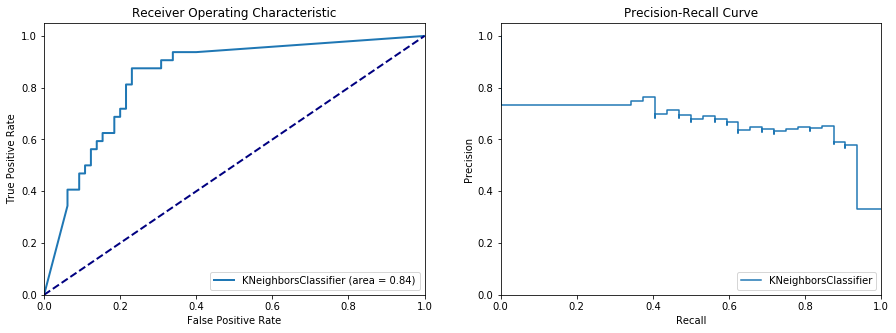

Training data best accuracy: 0.88269
Testing data accuracy: 0.75258

Classification Report:
             precision    recall  f1-score   support

          n       0.62      0.62      0.62        32
          p       0.82      0.82      0.82        65

avg / total       0.75      0.75      0.75        97



In [12]:
scores2, feature_names2, y_score2 = classification.fit_KNearestNeighbors(X_train, X_test, y_train, y_test, 'n')

#### Linear SVC

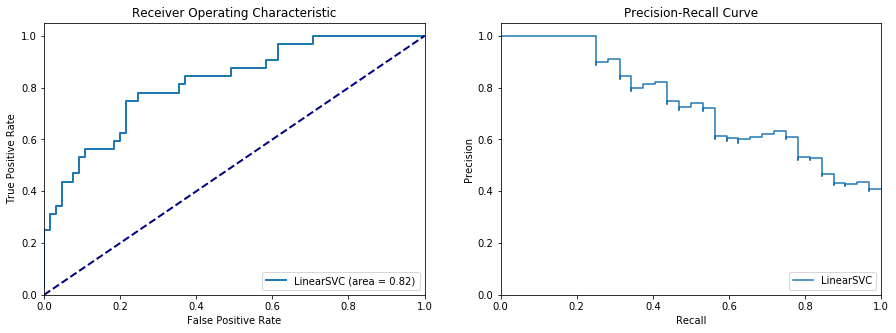

Training data best accuracy: 0.78308
Testing data accuracy: 0.73884

Classification Report:
             precision    recall  f1-score   support

        0.0       0.79      0.83      0.81        65
        1.0       0.62      0.56      0.59        32

avg / total       0.74      0.74      0.74        97



In [8]:
scores3, feature_names3, y_score3 = classification.fit_LinearSVC(X_train, X_test, y_train, y_test, 'n')

In [9]:
feature_names3

Index([['AW', 'Xu', 'GMTI', 'DZ', 'MZM2', 'diametert', 'Tigdi', 'Weight', 'nhev', 'bcutv14', 'bcutp14', 'IC1', 'IC3', 'IC4', 'IC5', 'CATS_DA6', 'CATS_DL9', 'CATS_AL9', 'Tac', 'Tnc', 'Tpc', 'QHmax', 'Chi0', 'dchi0', 'kappa1', 'MTPSA', 'EstateVSA1', 'VSAEstate8', 'ATSm1', 'ATSm4', 'ATSm6', 'ATSm7', 'ATSv8', 'ATSe1', 'ATSe2', 'ATSe6', 'ATSe7', 'ATSe8', 'ATSp1', 'ATSp8']], dtype='object')

In [10]:
y

0      n
1      n
2      p
3      p
4      p
5      p
6      p
7      p
8      p
9      p
10     p
11     p
12     n
13     p
14     p
15     p
16     p
17     n
18     p
19     p
20     p
21     n
22     p
23     n
24     p
25     n
26     p
27     p
28     p
29     p
      ..
357    n
358    p
359    n
360    p
361    p
362    p
363    n
364    n
365    p
366    p
367    n
368    n
369    n
370    p
371    n
372    n
373    p
374    p
375    n
376    n
377    n
378    n
379    n
380    n
381    n
382    p
383    n
384    n
385    p
386    p
Name: Target, Length: 387, dtype: object

#### Random Forest Classifier

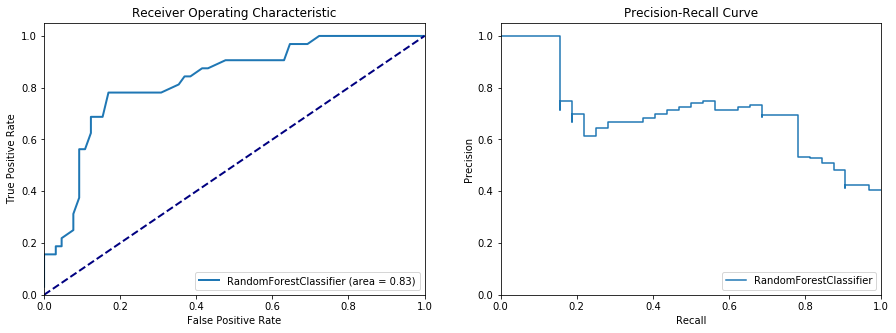

Training data best accuracy: 0.89332
Testing data accuracy: 0.77574

Classification Report:
             precision    recall  f1-score   support

          n       0.72      0.56      0.63        32
          p       0.81      0.89      0.85        65

avg / total       0.78      0.78      0.78        97



In [14]:
scores4, feature_names4, y_score4 = classification.fit_RandomForestClassifier(X_train, X_test, y_train, y_test, 'n')

#### SGD Classifier

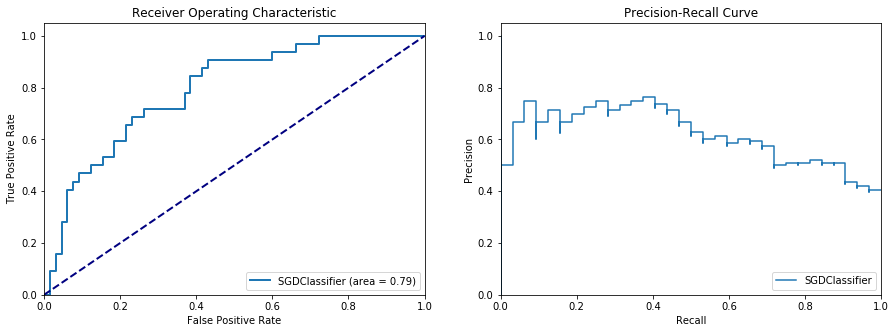

Training data best accuracy: 0.76492
Testing data accuracy: 0.74645

Classification Report:
             precision    recall  f1-score   support

        0.0       0.83      0.77      0.80        65
        1.0       0.59      0.69      0.64        32

avg / total       0.75      0.74      0.75        97



In [15]:
scores5, feature_names5, y_score5 = classification.fit_SGDClassifier(X_train, X_test, y_train, y_test, 'n')

#### MLP Classifier

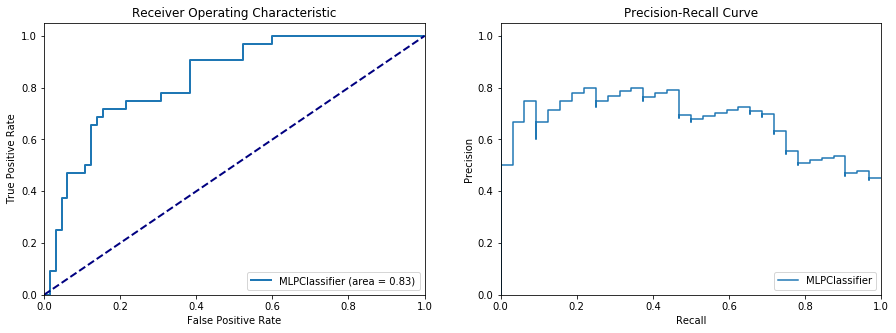

Training data best accuracy: 0.85139
Testing data accuracy: 0.80487

Classification Report:
             precision    recall  f1-score   support

          n       0.70      0.72      0.71        32
          p       0.86      0.85      0.85        65

avg / total       0.81      0.80      0.80        97



In [16]:
scores6, feature_names6, y_score6 = classification.fit_MLPClassifier(X_train, X_test, y_train, y_test, 'n')

### Results

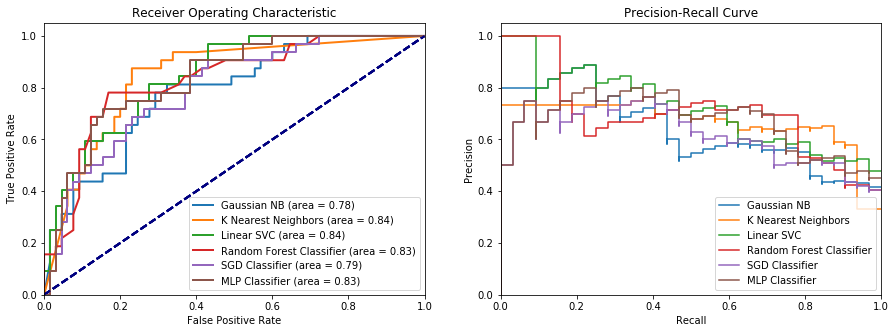

,Model,Accuracy,Area under ROC,Precision,Recall,F1 Score,Matthews Correlation,Jaccard Similarity,Zero One Loss
0,GaussianNB,0.701031,0.783173,0.555556,0.46875,0.508475,0.298075,0.701031,0.298969
0,KNeighborsClassifier,0.752577,0.843269,0.625,0.625,0.625,0.440385,0.752577,0.247423
0,LinearSVC,0.742268,0.842308,0.594595,0.6875,0.637681,0.442095,0.742268,0.257732
0,RandomForestClassifier,0.783505,0.827885,0.72,0.5625,0.631579,0.488904,0.783505,0.216495
0,SGDClassifier,0.742268,0.793269,0.594595,0.6875,0.637681,0.442095,0.742268,0.257732
0,MLPClassifier,0.804124,0.834615,0.69697,0.71875,0.707692,0.560608,0.804124,0.195876


In [31]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
metrics.plot_roc(y_test, y_score1, 'n', 'Gaussian NB')
metrics.plot_roc(y_test, y_score2, 'n', 'K Nearest Neighbors')
metrics.plot_roc(y_test, y_score3, 'n', 'Linear SVC')
metrics.plot_roc(y_test, y_score4, 'n', 'Random Forest Classifier')
metrics.plot_roc(y_test, y_score5, 'n', 'SGD Classifier')
metrics.plot_roc(y_test, y_score6, 'n', 'MLP Classifier')

plt.subplot(122)
metrics.plot_prc(y_test, y_score1, 'n', 'Gaussian NB')
metrics.plot_prc(y_test, y_score2, 'n', 'K Nearest Neighbors')
metrics.plot_prc(y_test, y_score3, 'n', 'Linear SVC')
metrics.plot_prc(y_test, y_score4, 'n', 'Random Forest Classifier')
metrics.plot_prc(y_test, y_score5, 'n', 'SGD Classifier')
metrics.plot_prc(y_test, y_score6, 'n', 'MLP Classifier')

plt.show()

pd.concat([scores1,scores2,scores3,scores4,scores5,scores6])